In [1]:
# binomial single 
# prob of event
# binomial summation (tails)

In [2]:
# explain what discrete means

In [3]:
import math
from scipy.special import comb
from scipy.stats import binom
# add matplotlib

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-whitegrid') # add seaborn?

**Scipy** has a module called [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) that has a binomial distribution function under the header **Discrete Distributions**

[Scipy.special](https://docs.scipy.org/doc/scipy/reference/special.html)

[Scipy.stats Docs](https://docs.scipy.org/doc/scipy/reference/stats.html) 

In [5]:
numbers = [0,1,2,3,4,5,6,7]

for item in numbers:
    print(f"{item}! = {math.factorial(item):,}")

0! = 1
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
7! = 5,040


On **page 37** of this chapter, we're introduced to **combinatorics** or *"advanced counting"*.

This is commonly presented in the form ***INSERT LATEX***

Which reads "*n choose k*". What this expresses is the number of k combinations in n items.In R, this is the choose() function.

**Scipy.special** has a similar method called **comb** that does the same thing.

In [6]:
comb(N=3,k=2,exact=True) # exact=True returns an integer, exact=False float

3

**Scipy.stats** uses [**binom.pmf**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom) to calculate the binomial *probability mass function*.

On **page 39** is the example:

> *We could calculate the probability of flipping exactly 12 heads in 24 coin tosses.*

binom.pmf(k,n,p)

k = 12
n = 24
p = 0.5

In [7]:
probability = binom.pmf(12,24,0.5)

round(probability,4) # round returns an integer to four decimal places

0.1612

In [8]:
nums = list(range(0,24+1))
probs = [binom.pmf(n,24,0.5) for n in nums]

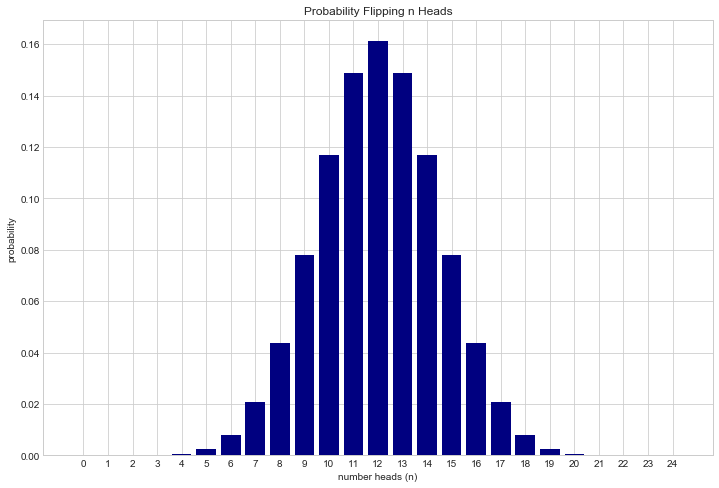

In [9]:
plt.figure(figsize=(12,8))
plt.title("Probability Flipping n Heads")

plt.xlabel("number heads (n)")
plt.ylabel('probability')

plt.bar(left=nums,height=probs,tick_label=nums,color="navy",);

In [10]:
# compare to the function I created
binomial_pmf(1,6,0.3)

NameError: name 'binomial_pmf' is not defined

In [ ]:
binom.cdf(5,6,0.3) # what does loc mean

### Summary of Python used:

combinations: comb(N,k,exact=True)

binomial probability mass function: binom.pmf(k,n,p)

binomial cumulative density function: binom.cdf(k,n,p)

### Questions

In [13]:
binom.cdf(1,6,0.25)

0.533935546875

In [93]:
def binom_probs(n,p):
    seq = [n for n in range(0,n+1)]
    return [binom.pmf(s,n,p) for s in seq]

In [95]:
tt = binom_probs(7,0.2);
tt

[0.20971519999999993,
 0.36700160000000004,
 0.27525120000000014,
 0.11468800000000005,
 0.028672000000000024,
 0.004300800000000003,
 0.0003584000000000004,
 1.28e-05]

In [86]:
sum(tt[3:])

0.6562500000000002

In [85]:
binom.cdf(3,6,0.5, loc=0)

0.6562499999999999

In [ ]:
# 3 is our k
# 6 is number of tries
# 0.5 is our p
# loc is where in the array we start from...verify with docs

In [46]:
binom.cdf(52,100,0.5,loc=0)

0.6913502932053737

In [ ]:
# binom.sf? binom_test

In [53]:
# 1- binom.cdf(0,100,0.0072)

0.5145138452542941

In [73]:
binom.sf(1,100,0.0072)

0.16242880152251843

In [109]:
binom.cdf(0,7,0.2)

0.20971520000000007

In [123]:
for i in list(range(0,5+1)):
    print(binom.pmf(i,25,0.1))

0.07178979876918526
0.19941610769218102
0.26588814358957313
0.22649730750222946
0.13841502125136254
0.06459367658396949


In [125]:
# first two numbers above truncated at five
0.071789 + 0.199416

0.27120500000000003

In [141]:
# !! ppf inverse of cdf
# binom.ppf

nan

In [145]:
# survival function prob at the random variable is larger (but not) than k
# so 1 is 
binom.sf(1,25,0.1)

0.7287940935386334

In [127]:
# "the cumulative density up to one is 27%" less than a number
binom.cdf(1,25,0.1)

0.27120590646136633

In [148]:
binom.sf(1,25,0.1) + binom.cdf(1,25,0.1)

0.9999999999999998

In [160]:
gt = binom.sf(0,100,0.0072) # chance the rv > 0
gt

0.5145138452542948

In [161]:
lt = binom.cdf(0,100,0.0072) # chance the rv < 1
lt

0.4854861547457059

In [165]:
gt + lt

1.0000000000000007

what this says is the chance of "at least two offers" only scenarios are
less than 2 (ie 0 or 1 offers). so binom cdf calculates the array of pdf probs for all seven attempts. then it calculates 

In [ ]:
Lesson idea: How to find a probability problem.